In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst jobs
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()


<function matplotlib.pyplot.show(close=None, block=None)>

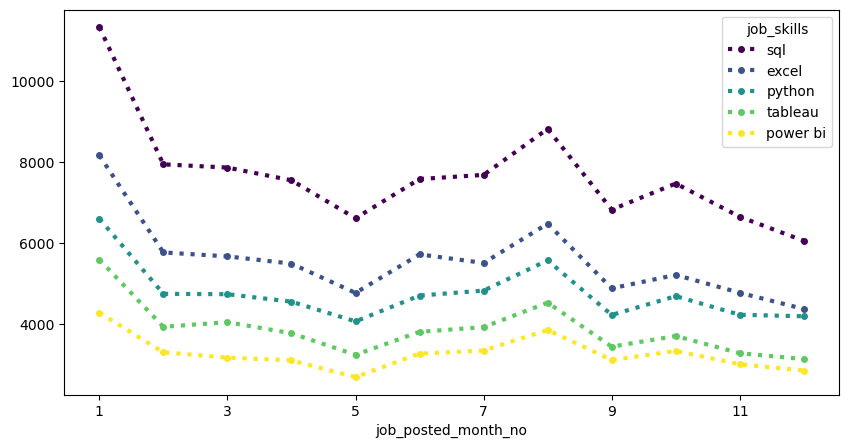

In [28]:
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month
df_da_explode = df_da.explode('job_skills')
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('total')
df_da_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize='4',
    figsize=(10,5)
    )
plt.show

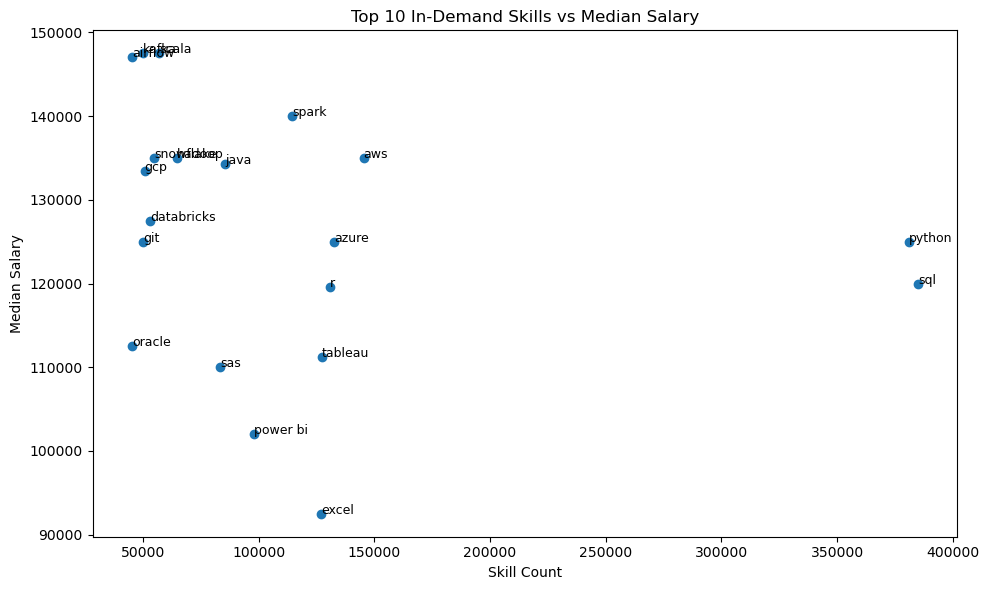

In [29]:
# Explode skills list so each skill gets its own row
df_exploded = df.explode('job_skills')

# Group by skill to get count and median salary
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Sort by skill count and get top 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(skill_stats['skill_count'], skill_stats['median_salary'])

# Add text labels to each point
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt, fontsize=9)

# Add labels and title
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.title('Top 10 In-Demand Skills vs Median Salary')
plt.tight_layout()
plt.show()

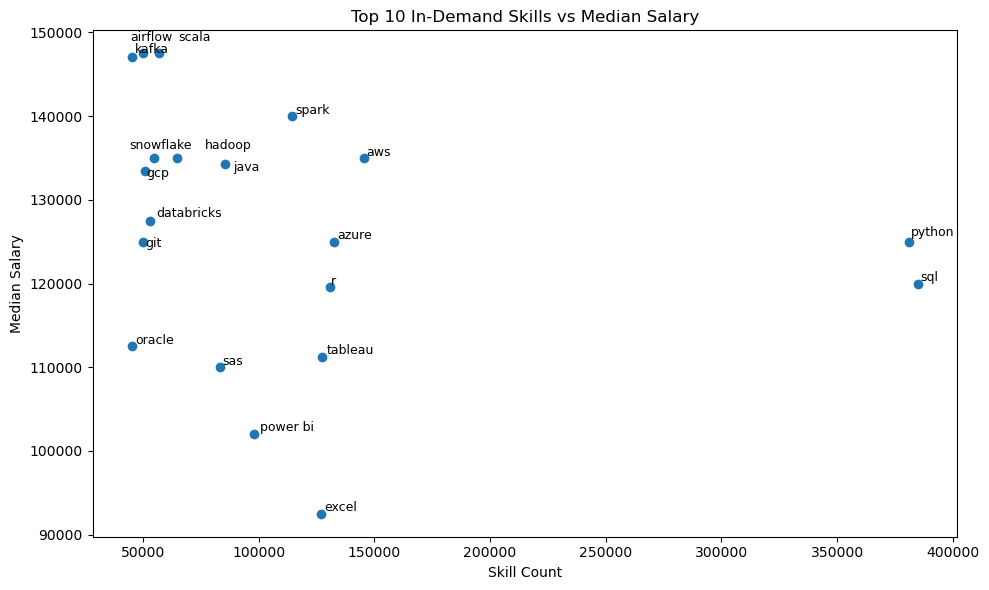

In [3]:
# Explode skills list so each skill gets its own row
df_exploded = df.explode('job_skills')

# Group by skill to get count and median salary
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Sort by skill count and get top 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(skill_stats['skill_count'], skill_stats['median_salary'])

texts = []
# Add text labels to each point
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt, fontsize=9))

adjust_text(texts)
# Add labels and title
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.title('Top 10 In-Demand Skills vs Median Salary')
plt.tight_layout()
plt.show()